# Etude de l'impact de la crise sanitaire sur les différents secteurs de Grand Est

## Sommaire

- [I. Présentation des données](#present_data)
    - [I.A Presentation des variables](#1.A)
    - [I.B Selection des variables](#1.B)
    - [I.C Transformations en séries temporelles](#1.C)
- [II. Univariate TS Analysis](#univariate)
    - [II.A Travail sur le nombre total d'établissements de Grand-Est](#univariateA)


In [1]:
suppressPackageStartupMessages(require(skimr))
suppressPackageStartupMessages(require(readxl))
suppressPackageStartupMessages(require(stringr))
suppressPackageStartupMessages(require(dplyr))
suppressPackageStartupMessages(require(ggplot2))

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”


In [2]:
df <- read_excel("data/data.xlsx",sheet = 3)

<div id="present_data">

# I. Presentation des données et nettoyage

In [3]:
skim(df)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,champ,0,1.00000000,3,14,0,7,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,type_aire,0,1.00000000,6,11,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,type_naf,0,1.00000000,7,11,0,7,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,aire,0,1.00000000,6,29,0,120,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,secteur,0,1.00000000,5,55,0,217,0,NA,NA,NA,NA,NA,NA,NA,NA
6,character,secret_stat,5361,0.05349576,11,11,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
7,numeric,nb_etab2010T1,303,0.94650424,NA,NA,NA,NA,NA,2274.569,23053.71,3,40,138,630,1507250,▇▁▁▁▁
8,numeric,nb_etab2010T2,303,0.94650424,NA,NA,NA,NA,NA,2300.447,23322.51,3,42,140,637,1525367,▇▁▁▁▁
9,numeric,nb_etab2010T3,303,0.94650424,NA,NA,NA,NA,NA,2303.091,23456.83,3,42,140,634,1535677,▇▁▁▁▁


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             5664  
Number of columns          144   
_______________________          
Column type frequency:           
  character                6     
  numeric                  138   
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 champ                 0        1        3  14     0        7          0
2 type_aire             0        1        6  11     0        3          0
3 type_naf              0        1        7  11     0        7          0
4 aire                  0        1        6  29     0      120          0
5 secteur               0        1        5  55     0      217          0
6 secret_stat        5361        0.0535  11  11     0        1          0

── Variable type: 


<div id="1.A">

## I.A Presentation des données : Modalités des variables qualitatives

La base de données se compose de 6 variables qualitatives:
 - `champ` : ASSOCIATIONS, COOPERATIVES , ESS , ESS_PLUS, FONDATIONS, MUTUELLES , PRIVE HORS ESS
 - `type_aire` : DEPARTEMENT , FRANCE , NOUV_REGION
 - `type_naf` : NAF ASSO, NAF_ASSO_AG , NAF_COOPE, NAF_ESS, NAF_AUTRES, NAF_FOND, NAF_MUT
 - `aire`: Ensemble des département sous le format 01_AIN + modalité FRANCE + REGIONS : "44_GRAND EST"
 - `secteur` : Cas particulier les groupes de secteurs depende de l'air. Etant donnée qu'ici l'on va s'interesser exclusivement à l'echelle régionale : En voici les modalité : 
 - `secret_stat`: NA / secret_stat

<hr>

<div id="1.B">

## I.B Selection des données necessaires pour l'étude.

Notre problematique se pose dans un contexte précis : NOus voulons observer uniquement l'évolution des secteurs d'activité de Grand Est. Ainsi nous ne somme interessé que par une sous partie de cette table.
Ainsi selectionons la sous partie necessaire à notre étude.

In [4]:
tmp <-df%>% filter(aire=="44_GRAND EST" & champ=="ESS")

On obtient alors une table qui se compose de 28 serie temporelle differentes correspondant aux 27 secteurs d'activité différents + TOTAL . La nomenclature de ces secteurs d'activité est lié à nos précedent filtre sur le l'aire et le champ.
`type_naf`est alors fixé à `NAF_ESS`, `champ` a ESS , `type_aire` à NOUV_REGION , `aire` à GE 

In [5]:
skim(tmp)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,champ,0,1.00000000,3,3,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,type_aire,0,1.00000000,11,11,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,type_naf,0,1.00000000,7,7,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,aire,0,1.00000000,12,12,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,secteur,0,1.00000000,5,55,0,28,0,NA,NA,NA,NA,NA,NA,NA,NA
6,character,secret_stat,27,0.03571429,11,11,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
7,numeric,nb_etab2010T1,1,0.96428571,NA,NA,NA,NA,NA,997.8148,2586.661,17,82.0,211,938.0,13471,▇▁▁▁▁
8,numeric,nb_etab2010T2,1,0.96428571,NA,NA,NA,NA,NA,1008.6296,2615.931,17,82.0,213,958.0,13617,▇▁▁▁▁
9,numeric,nb_etab2010T3,1,0.96428571,NA,NA,NA,NA,NA,1003.7407,2601.166,17,82.0,228,949.0,13551,▇▁▁▁▁


── Data Summary ────────────────────────
                           Values
Name                       tmp   
Number of rows             28    
Number of columns          144   
_______________________          
Column type frequency:           
  character                6     
  numeric                  138   
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 champ                 0        1        3   3     0        1          0
2 type_aire             0        1       11  11     0        1          0
3 type_naf              0        1        7   7     0        1          0
4 aire                  0        1       12  12     0        1          0
5 secteur               0        1        5  55     0       28          0
6 secret_stat          27        0.0357  11  11     0        1          0

── Variable type: 

On observe qu'il ne reste dans notre table qu'un unique secret_stat

In [6]:
tmp[which(!is.na(tmp$secret_stat)),]

champ,type_aire,type_naf,aire,secteur,secret_stat,nb_etab2010T1,nb_etab2010T2,nb_etab2010T3,nb_etab2010T4,⋯,sal2019T1,sal2019T2,sal2019T3,sal2019T4,sal2020T1,sal2020T2,sal2020T3,sal2020T4,sal2021T1,sal2021T2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ESS,NOUV_REGION,NAF_ESS,44_GRAND EST,ZZ_Non classé ailleurs,secret_stat,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Ce `NA` correspond à la modalité `ZZ_Non classé ailleurs` des secteurs d'activité que nous decidons donc d'exclure de l'étude.

In [7]:
df <-tmp[-which(!is.na(tmp$secret_stat)),]%>%select(-secret_stat)
df <- df %>% select(-champ,-type_aire,-type_naf,-aire)

In [8]:
skim(df)%>%head(1)

skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
character,secteur,0,1,5,55,0,27,0,NA,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             27    
Number of columns          139   
_______________________          
Column type frequency:           
  character                1     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 secteur               0             1   5  55     0       27          0


De plus nous nous interessons dans cette étude uniquement aux nombre d'établissement de chaque secteurs d'activités. AInsi debarassons nous des autres variables

In [9]:
df <- df[,c(TRUE,str_detect(colnames(df),"nb_etab")[-1])]
skim(df)

### Revoir la nomenclature des secteur d'activité

In [11]:
moda.secteurs <-as.factor(df$secteur)%>%data.frame
colnames(moda.secteurs) <-"Modalité secteurs"
moda.secteurs

Modalité secteurs
<fct>
"64 Activités des services financiers, hors assurance et"
65-66 Assurance ; Activités auxiliaires de services fin
852 Enseignement primaire
853 Enseignement secondaire
85x Enseignement / Autre
861 Activités hospitalières
862 Activité des médecins et des dentistes
869 Autres activités pour la santé humaine
87 Hébergement médico-social et social


Le problème de cette classification est que cette dernière est trop détaillée en pensant d'ors et déjà a l'analyse multivarié : Garder un nombre tel de serie temporelles va poser un problème lors des futures estimations : **Fleau du nombre de dimension**

La réduction du nombre de dimension sera un passage obligatoire en ce qui concerne l'analyse des Serie temporelles en multivarié

<hr>

<div id="1.C">

## I.C Transformation en serie temporelles multivariées

In [12]:
tmp <- t(df)
colnames(tmp) <- tmp[1,]
tmp <-tmp[-1,]
df <- tmp
df


,"64 Activités des services financiers, hors assurance et",65-66 Assurance ; Activités auxiliaires de services fin,852 Enseignement primaire,853 Enseignement secondaire,85x Enseignement / Autre,861 Activités hospitalières,862 Activité des médecins et des dentistes,869 Autres activités pour la santé humaine,87 Hébergement médico-social et social,881 Action sociale sans hébergement pour personnes âgée,⋯,JA_Edition et audiovisuel,JB-JC_Télécommunications et ativités informatiques,LZ_Activités immobilières,"MA_Activités juridiques, de conseil et d'ingénierie",MB-MC_R&d et autres activités scientifiques et techniqu,NZ_Activités de services administratifs et de soutien,"RZ_Arts, spectacles et activités récréatives",SZ_autres activités de services,i_Industrie et agriculture,TOTAL
nb_etab2010T1,1290,355,70,156,1183,94,135,123,898,573,⋯,109,18,32,211,67,338,978,3087,49,13471
nb_etab2010T2,1284,354,72,156,1192,92,136,124,897,570,⋯,112,19,30,212,69,341,1019,3154,50,13617
nb_etab2010T3,1279,356,72,156,1147,92,148,126,902,572,⋯,109,19,32,205,71,346,996,3119,54,13551
nb_etab2010T4,1278,347,72,156,1185,94,139,125,905,573,⋯,112,19,32,199,71,345,1023,3133,51,13592
nb_etab2011T1,1276,393,71,155,1168,99,150,124,902,565,⋯,111,20,29,198,71,341,1002,3056,49,13486
nb_etab2011T2,1274,394,71,153,1179,98,151,125,908,561,⋯,110,17,29,204,69,346,1035,3107,47,13552
nb_etab2011T3,1269,392,72,157,1122,98,150,123,910,560,⋯,106,18,32,202,69,350,998,3094,50,13430
nb_etab2011T4,1267,392,70,150,1162,96,150,124,913,556,⋯,112,16,32,202,73,340,1008,3094,52,13475
nb_etab2012T1,1259,394,68,147,1169,96,152,125,910,549,⋯,108,15,32,199,75,335,995,3097,53,13443
nb_etab2012T2,1257,393,68,147,1173,97,154,126,919,551,⋯,108,17,32,199,72,334,1036,3149,53,13564


In [14]:
#------------------------
# Format Date variable

tmp <-df%>%as.data.frame
tmp <-cbind("date"=rep(NA,nrow(tmp)),tmp)
for (i in 1:nrow(tmp)){
    tmp.format.date <- strsplit(rownames(df)[i],"nb_etab")[[1]][2]
    subsplit <-strsplit(tmp.format.date,"T")[[1]]
    year<-subsplit[1]
    trimester <- subsplit[2]
    month <-switch(trimester,
        "1"="01",
        "2"="04",
        "3"="07",
        "4"="10"
    )
    tmp[i,1] <- paste(year,month,"01",sep="-")
}
tmp$date <-as.Date(tmp$date)
rownames(tmp) <- NULL
tmp

date,"64 Activités des services financiers, hors assurance et",65-66 Assurance ; Activités auxiliaires de services fin,852 Enseignement primaire,853 Enseignement secondaire,85x Enseignement / Autre,861 Activités hospitalières,862 Activité des médecins et des dentistes,869 Autres activités pour la santé humaine,87 Hébergement médico-social et social,⋯,JA_Edition et audiovisuel,JB-JC_Télécommunications et ativités informatiques,LZ_Activités immobilières,"MA_Activités juridiques, de conseil et d'ingénierie",MB-MC_R&d et autres activités scientifiques et techniqu,NZ_Activités de services administratifs et de soutien,"RZ_Arts, spectacles et activités récréatives",SZ_autres activités de services,i_Industrie et agriculture,TOTAL
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2010-01-01,1290,355,70,156,1183,94,135,123,898,⋯,109,18,32,211,67,338,978,3087,49,13471
2010-04-01,1284,354,72,156,1192,92,136,124,897,⋯,112,19,30,212,69,341,1019,3154,50,13617
2010-07-01,1279,356,72,156,1147,92,148,126,902,⋯,109,19,32,205,71,346,996,3119,54,13551
2010-10-01,1278,347,72,156,1185,94,139,125,905,⋯,112,19,32,199,71,345,1023,3133,51,13592
2011-01-01,1276,393,71,155,1168,99,150,124,902,⋯,111,20,29,198,71,341,1002,3056,49,13486
2011-04-01,1274,394,71,153,1179,98,151,125,908,⋯,110,17,29,204,69,346,1035,3107,47,13552
2011-07-01,1269,392,72,157,1122,98,150,123,910,⋯,106,18,32,202,69,350,998,3094,50,13430
2011-10-01,1267,392,70,150,1162,96,150,124,913,⋯,112,16,32,202,73,340,1008,3094,52,13475
2012-01-01,1259,394,68,147,1169,96,152,125,910,⋯,108,15,32,199,75,335,995,3097,53,13443


In [15]:
train.indexes <-which(tmp$date < as.Date("2020-01-01"))

In [16]:
tmp <-tmp %>%select(-date)%>% mutate_all(as.numeric)

In [17]:
df.ts <- ts(tmp,start=c(2010,1),frequency=4)

<hr>


<div id="univariate">

# II. Univariate TS Analysis

Commencons par vizualiser les evolutions décrites par chacunes des séries Temporelles : 


In [18]:
#Le problème qui se pose est le suivant : Meme en univarié travaillé sur 27 series differentes n'est pas confortable. 
# Le regroupement est ici aussi necesaire.
dim(df.ts)

[1] 46 27

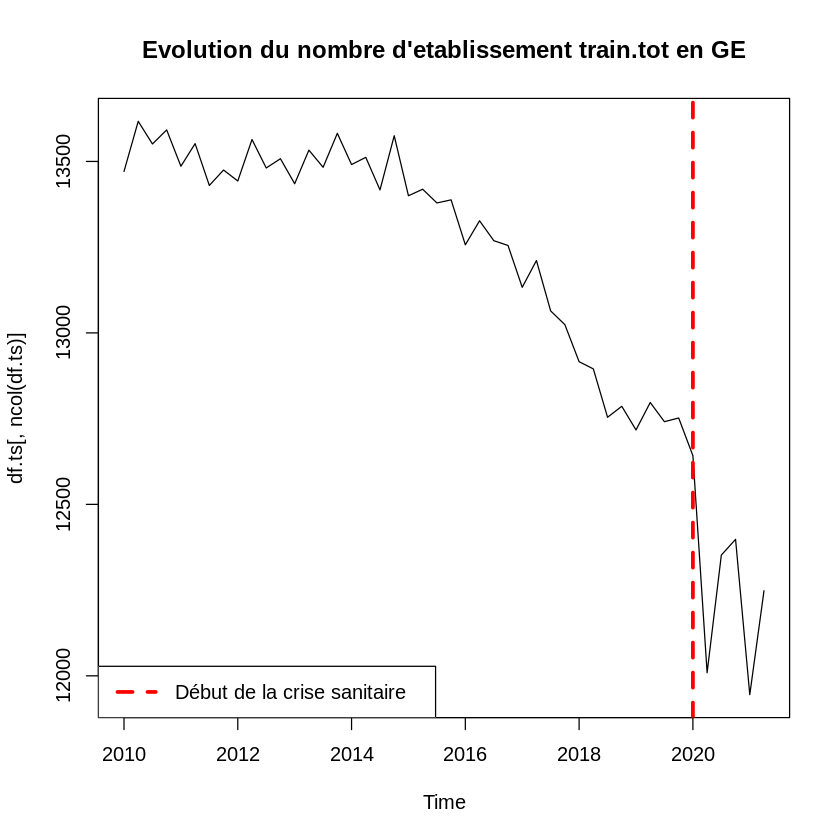

In [19]:
plot(df.ts[,ncol(df.ts)],main="Evolution du nombre d'etablissement train.tot en GE")
abline(v = 2020, col = "red",
                      lty =  2, lwd = 3)

legend(x = "bottomleft", lty = 2,  
       col= "red", lwd=3,
       legend="Début de la crise sanitaire")

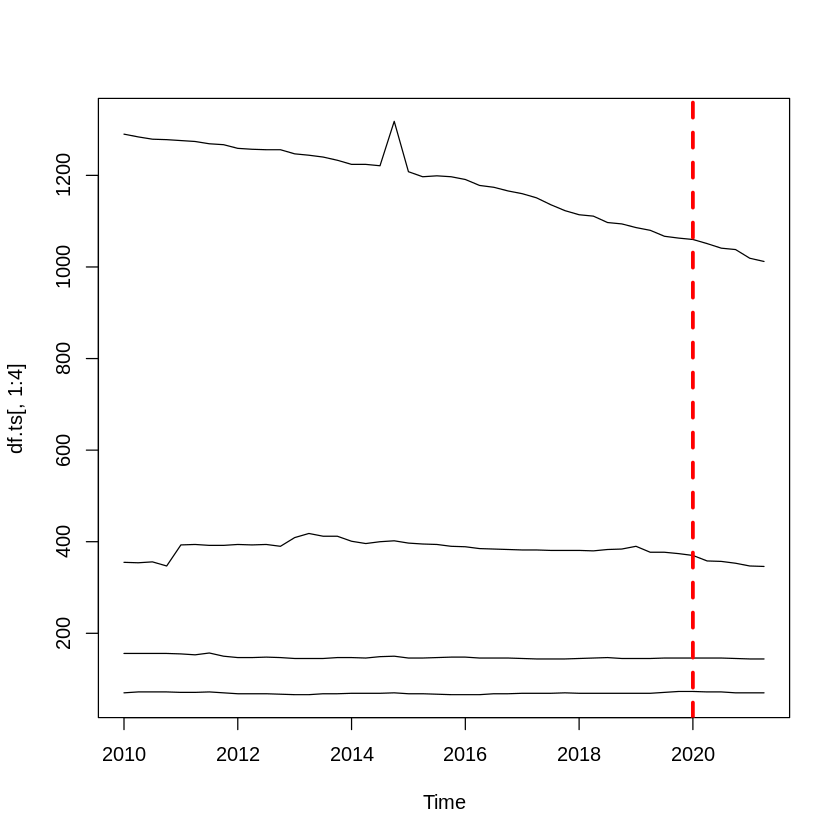

In [20]:

plot.ts(df.ts[,1:4],
plot.type="single")
abline(v = 2020, col = "red",
                      lty =  2, lwd = 3)


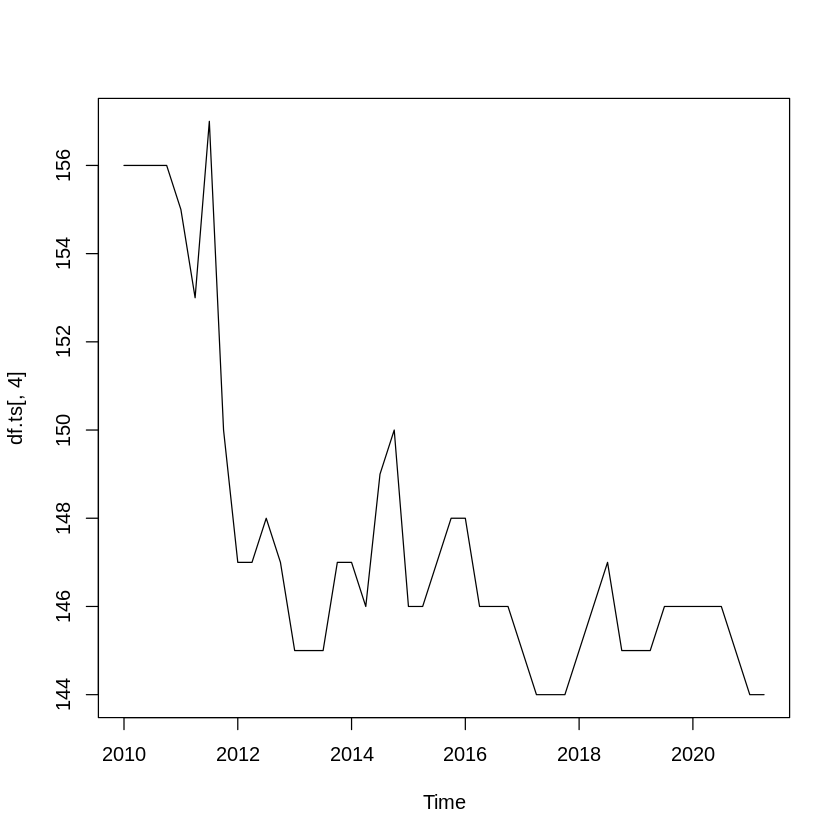

In [21]:
plot.ts(df.ts[,4],plot.type = "single")

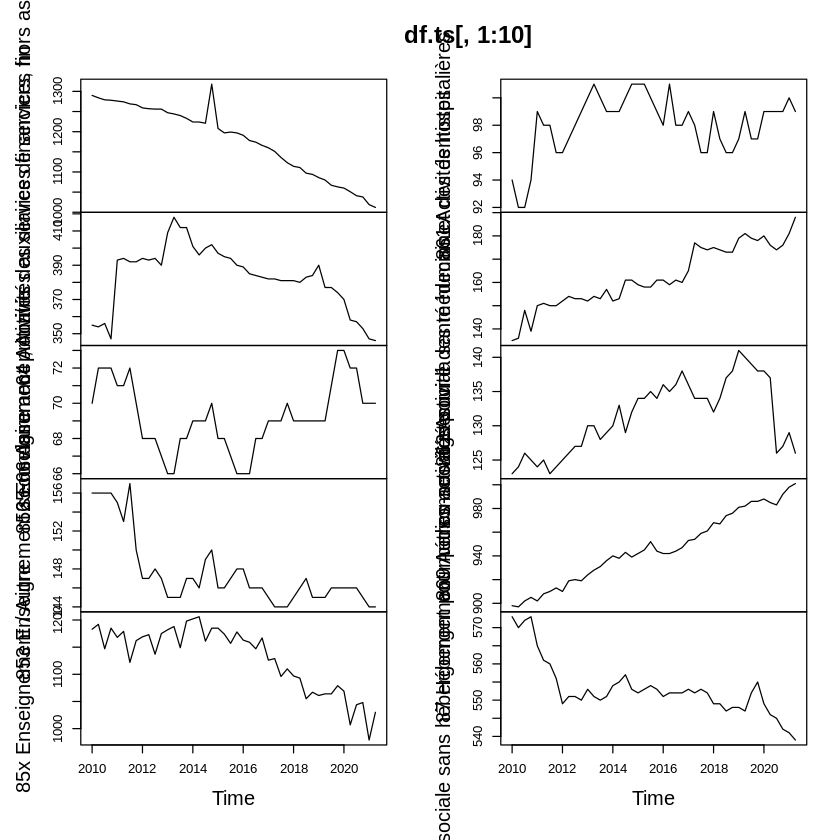

In [22]:
plot.ts(df.ts[,1:10])

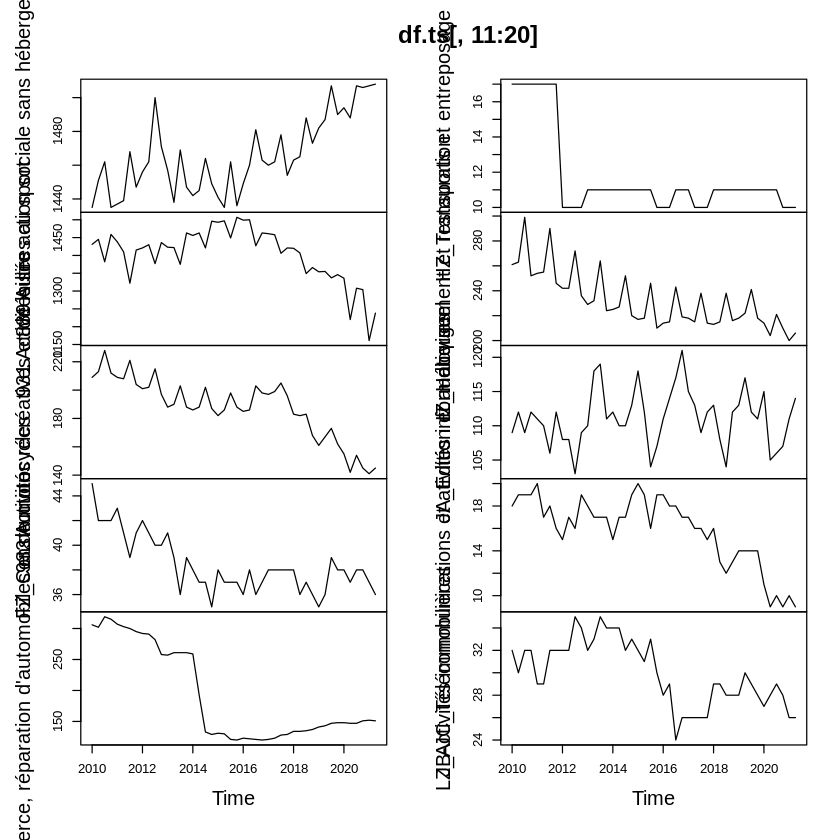

In [23]:
plot.ts(df.ts[,11:20])

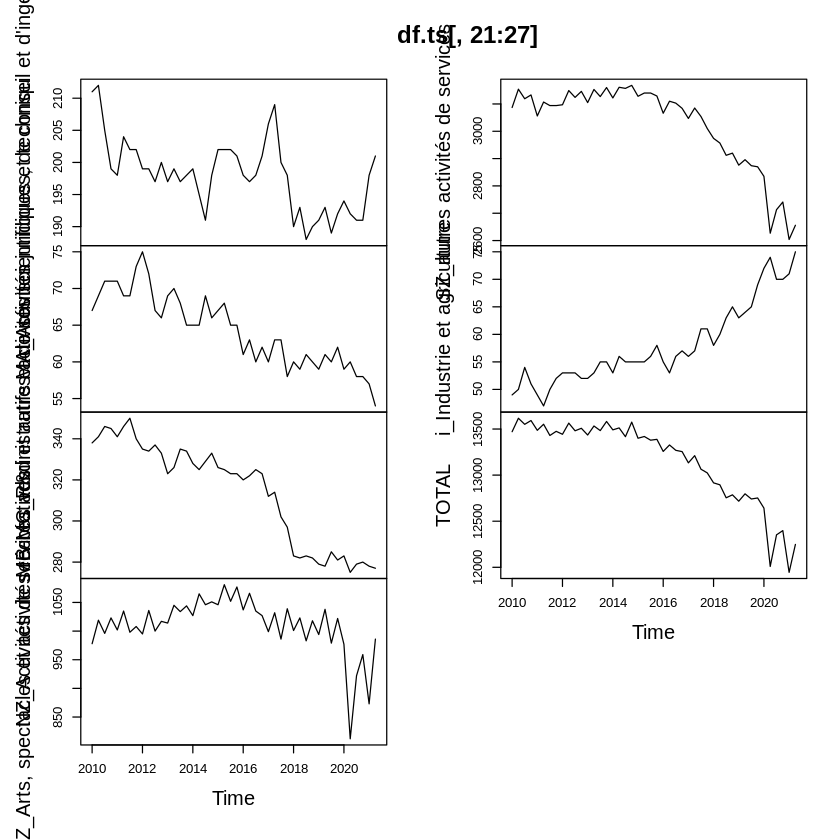

In [24]:
plot.ts(df.ts[,21:27])

Les series numeros 6, 9, 11 , 18, 21, 26 semblent etre a contre courant de la tendance decroissante des autres secteurs d'activité avec l'arrivée de la crise sanitaire.


 
<hr>

<div id="univariateA">

## II.A Travail sur la serie du nombre train.tot d'établissement

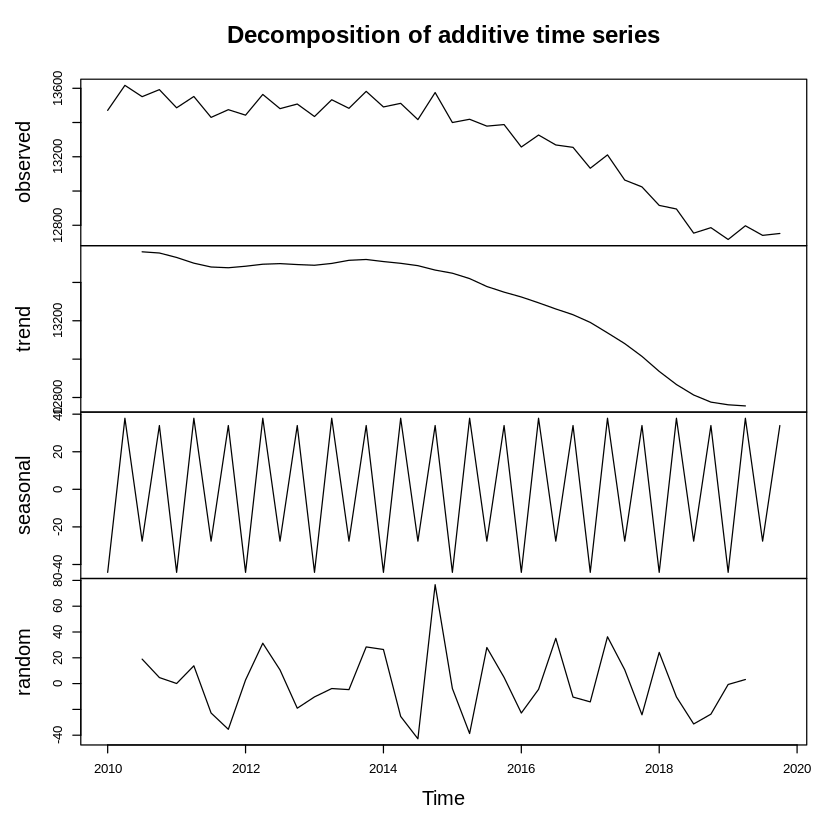

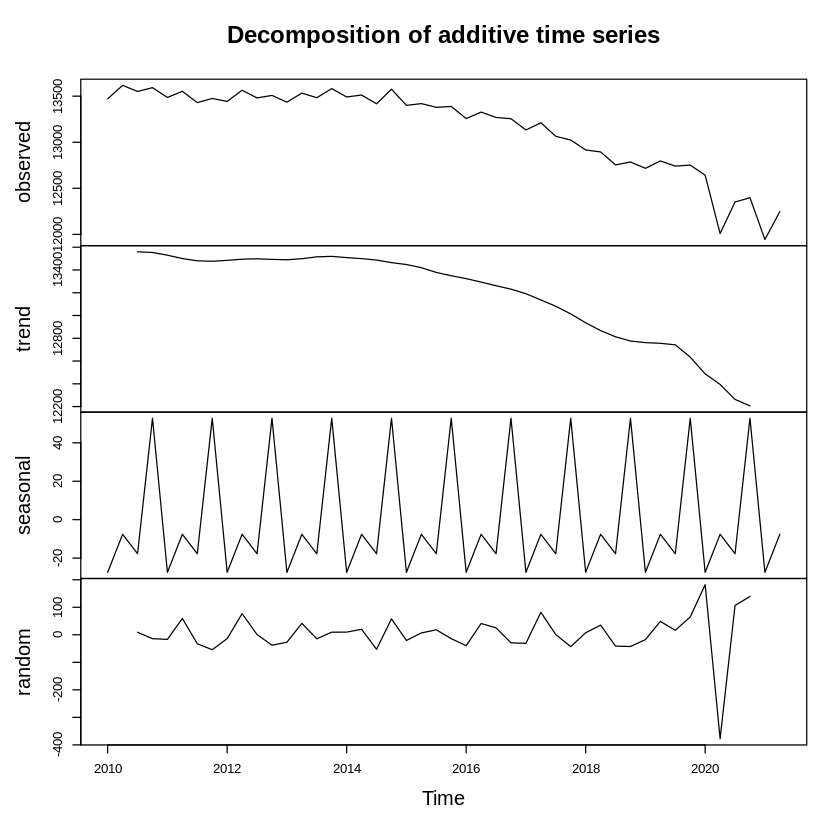

In [47]:
tot.ts <-df.ts[,ncol(df.ts)]
#print(tot.ts)

train.tot.ts <-ts(tot.ts[train.indexes],start=c(2010,1),frequency=4)
test.tot.ts <- ts(tot.ts[train.indexes[length(train.indexes)]:length(tot.ts)],start=c(2020,1),frequency=4)
par(mfrow=c(1,2))
plot(decompose(train.tot.ts))
plot(decompose(tot.ts))

,Qtr1,Qtr2,Qtr3,Qtr4
2020,12752,12642,12009,12352
2021,12398,11945,12248,


La crise sanitaire interviens comme un elements aléatoire 

On semble tout de meme observer une saisonnalité de 2 trimestre: 4+4=8
Ainsi qu'une trend lineaire

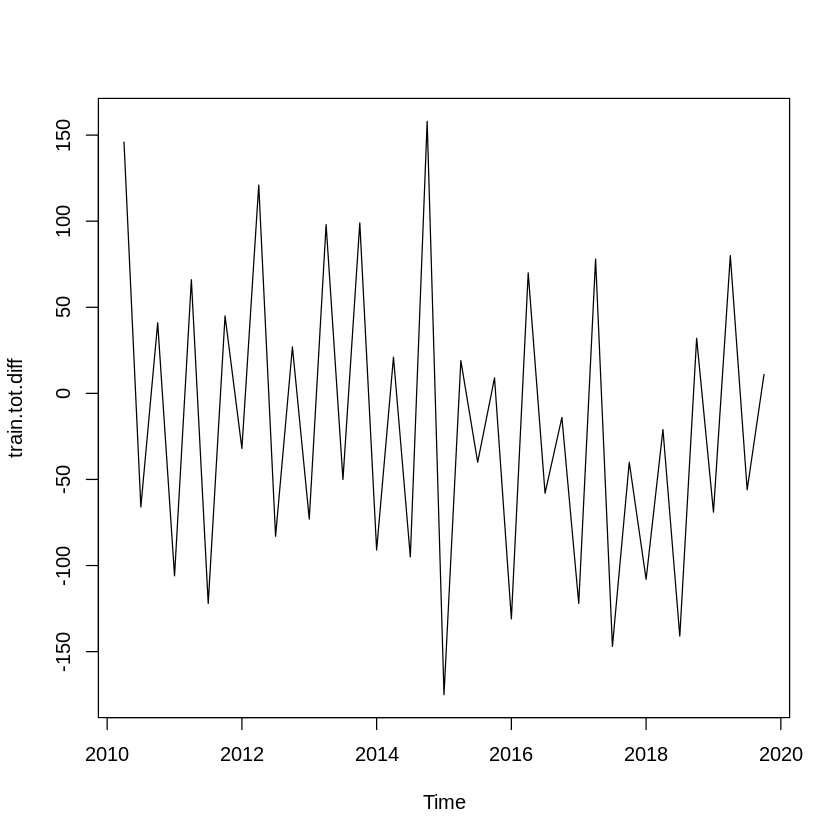

In [26]:
train.tot.diff <- diff(train.tot.ts,lag=1)
plot.ts(train.tot.diff)

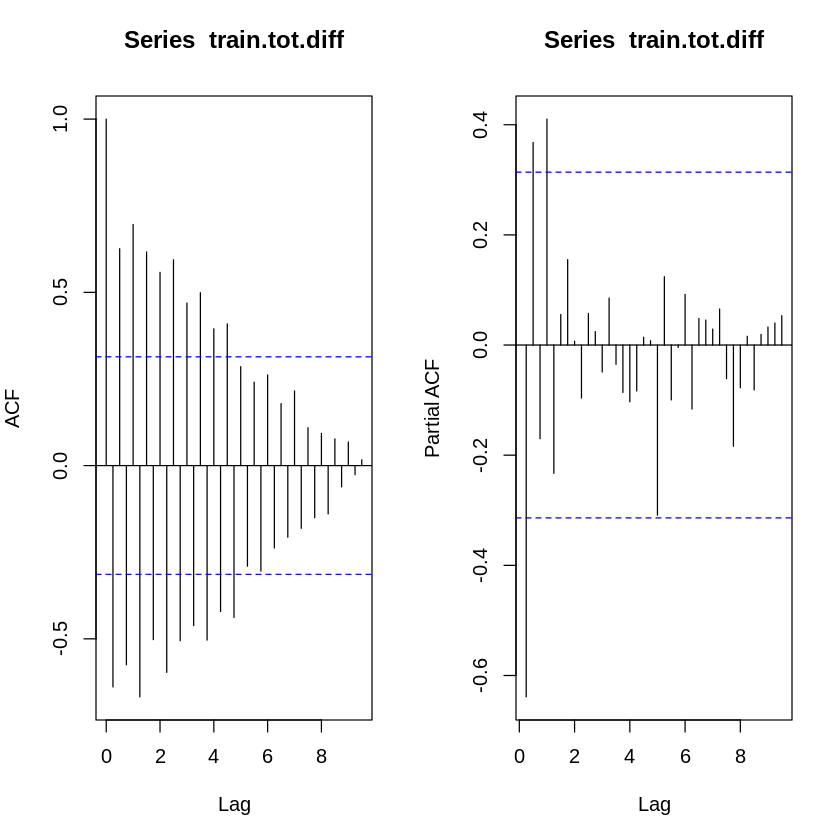

In [27]:
par(mfrow=c(1,2),mar=c(5,4,4,2))
acf(train.tot.diff,lag=100)
pacf(train.tot.diff,lag=100)

La procedure semble etre bien differencie

In [28]:

require(forecast)

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [57]:
mod.1.bis <-auto.arima(train.tot.ts)
prev.1.bis <-forecast(mod.1.bis,h=7)

In [35]:
mod.1 <- arima(train.tot.ts,order=c(0,1,0),seasonal=c(0,1,1))

In [38]:
test.bb <-Box.test(mod.1$res)$p.value
alpha=0.1
test.bb>=alpha# Test de blancheur des residus passé

[1] TRUE

In [54]:
pred.1 <- predict(mod.1,n.ahead=6)$pred
predict(mod.1,n.ahead=7)$pred
test.tot.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2020,12650.97,12704.07,12613.47,12632.21
2021,12531.18,12584.29,12493.68,


,Qtr1,Qtr2,Qtr3,Qtr4
2020,12752,12642,12009,12352
2021,12398,11945,12248,


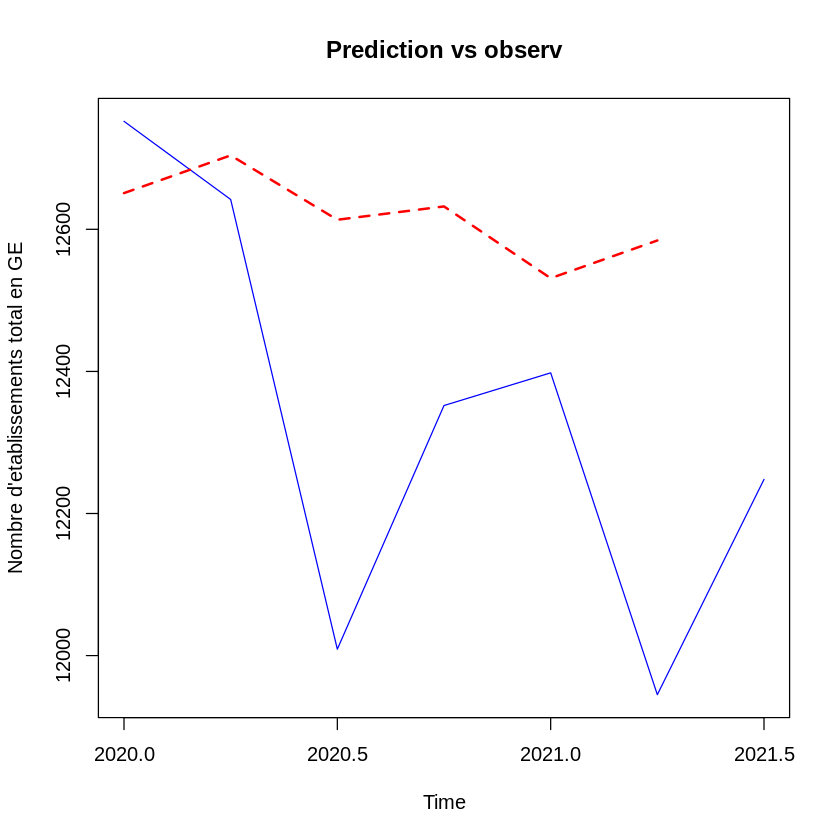

In [55]:
plot.ts(test.tot.ts,
    col="blue",
    main="Prediction vs observ",
    xlab="Time",
    ylab="Nombre d'etablissements total en GE"
)
lines(pred.1,col="red",lty=2,lwd=2)


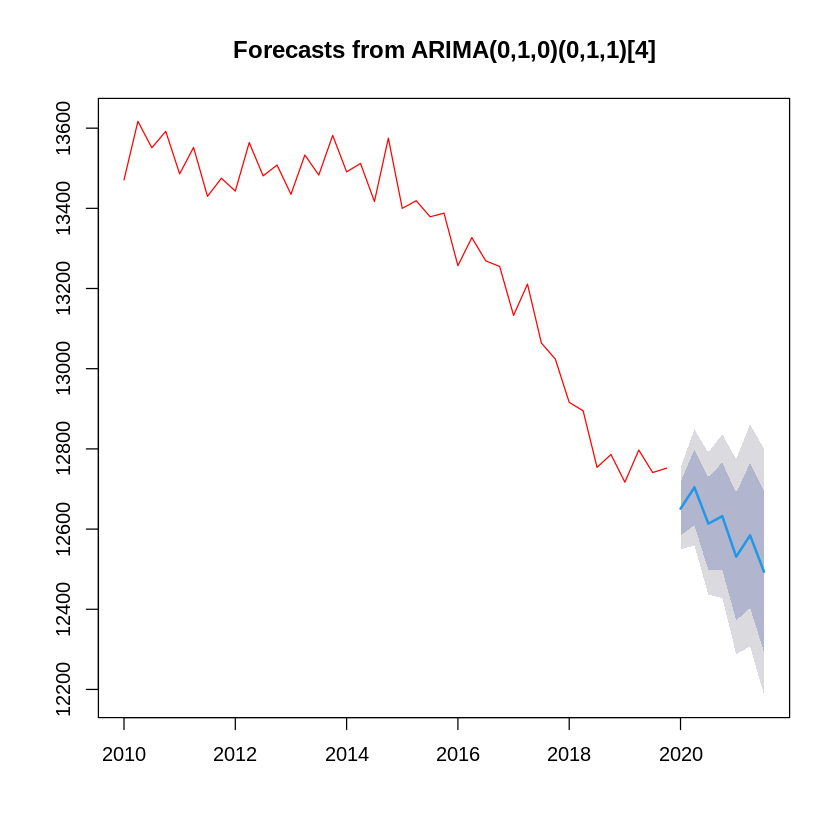

In [58]:
plot(prev.1.bis,col="red")